In [126]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [127]:
# Each row represents a station where users can pickup or return bikes.
stations = pd.read_csv("Bay-Area-Bike-Share-Station.csv")
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [183]:
# Each row represents an individual bike trip.
trips = pd.read_csv("Bay-Area-Bike-Share-Trip.csv")
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [129]:
trips.columns

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code'],
      dtype='object')

In [165]:
# Each row represents the weather for a specific 
# day and zip code in the bay area.
weather = pd.read_csv("Bay-Area-Bike-Share-Weather.csv")
weather = weather[['date', 'mean_temperature_f', 'mean_dew_point_f',
                  'mean_humidity', 'mean_visibility_miles','mean_wind_speed_mph',
                  'precipitation_inches', 'cloud_cover', 'events','zip_code']]
weather.head()

,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,zip_code
0,8/29/2013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107
1,8/30/2013,69.0,58.0,70.0,10.0,13.0,0,2.0,NaN,94107
2,8/31/2013,64.0,56.0,75.0,10.0,15.0,0,4.0,NaN,94107
3,9/1/2013,66.0,56.0,68.0,10.0,13.0,0,4.0,NaN,94107
4,9/2/2013,69.0,60.0,77.0,10.0,12.0,0,6.0,NaN,94107


* How many bike stations in total in Bay Area?
* How many stations in each city?
* Which city has the most stations?
* Which city has the most bikes?
* Which station has the most of bikes?
* From which station people prefer to start their trips?
* In which month people prefer to ride bikes?
* which route is the most popular one?
* what the average duration of trips?
* which bike it the most popular one?
* Which trip last for the longest?

In [132]:
# How many bike stations in total in Bay Area?
stations.count()

id                   70
name                 70
lat                  70
long                 70
dock_count           70
city                 70
installation_date    70
dtype: int64

In [133]:
# How many stations in each of the city?
# Which city has the most of stations?
stations['city'].value_counts()

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: city, dtype: int64

In [134]:
# Which station has the most of bikes?
stations.sort_values(by='dock_count', ascending=False).head(5)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
49,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,8/22/2013
55,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013
15,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,8/15/2013


In [135]:
# Which city has the most bikes?How many?
stations.groupby('city')['dock_count'].sum().sort_values(ascending=False).head()

city
San Francisco    665
San Jose         264
Mountain View    117
Redwood City     115
Palo Alto         75
Name: dock_count, dtype: int64

In [136]:
# From which station people prefer to start their trips?
trips['start_station_name'].value_counts().head(3)

San Francisco Caltrain (Townsend at 4th)    49092
San Francisco Caltrain 2 (330 Townsend)     33742
Harry Bridges Plaza (Ferry Building)        32934
Name: start_station_name, dtype: int64

In [137]:
# In which months people prefer to ride bikes?

# convert start_date into month 
trips['months'] =trips['start_date'].str.replace("/","").str.replace(":","").str.replace(" ","")
month_count = trips['months'].str.extract("(\d)\d+").value_counts()
print(month_count)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# output line1 "1" including 10,11,12 three months

# so I count 10,11,12 seperately, then compare to month_count from line 2
month10 = trips[trips['months'].str.contains("^10")]
month11 = trips[trips['months'].str.contains("^11")]
month12 = trips[trips['months'].str.contains("^12")]
print(month_count[1:])
print("10:", month10['months'].count())
print("11:", month11['months'].count())
print("12:", month12['months'].count())

# still confuesd that , "11" may be Nov. or Jan.1st

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


1    204899
8     65221
7     63755
6     61889
5     58042
4     57584
9     56925
3     56219
2     45425
Name: months, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~
8    65221
7    63755
6    61889
5    58042
4    57584
9    56925
3    56219
2    45425
Name: months, dtype: int64
10: 63325
11: 66170
12: 60092


In [138]:
# What the average duration of trips?
trips['min'] = trips['duration']/60
trips['min'].mean()

18.465830769743629

In [139]:
# which route is the most popular one?

In [140]:
# which bike it the most popular one?
trips['bike_id'].value_counts().head() 

392    2061
489    1975
558    1955
267    1951
631    1948
Name: bike_id, dtype: int64

In [141]:
# Which trip last for the longest? how many days?
trip_last = trips.sort_values(by='duration', ascending=False).head(3)
trip_last['days'] = trip_last['duration']/(60*60*12)
trip_want = trip_last[['id', 'start_station_name', 'duration', 'days',
'start_date','end_date', 'end_station_name']]
trip_want

,id,start_station_name,duration,days,start_date,end_date,end_station_name
573566,568474,South Van Ness at Market,17270400,399.777778,12/6/2014 21:59,6/24/2015 20:18,2nd at Folsom
382718,825850,Market at Sansome,2137000,49.467593,6/28/2015 21:50,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard)
440339,750192,San Antonio Shopping Center,1852590,42.884028,5/2/2015 6:17,5/23/2015 16:53,Castro Street and El Camino Real


In [145]:
# How does weather impact bike trips?
trips['months'] =trips['start_date'].str.replace("/","").str.replace("\d+\:\d+","").str.replace(" ","")
trips1 = trips[['duration', 'start_station_name','end_station_name',
                'bike_id','zip_code','months']]
trips1

,duration,start_station_name,end_station_name,bike_id,zip_code,months
0,63,South Van Ness at Market,South Van Ness at Market,520,94127,8292013
1,70,San Jose City Hall,San Jose City Hall,661,95138,8292013
2,71,Mountain View City Hall,Mountain View City Hall,48,97214,8292013
3,77,San Jose City Hall,San Jose City Hall,26,95060,8292013
4,83,South Van Ness at Market,Market at 10th,319,94103,8292013
5,103,Golden Gate at Polk,Golden Gate at Polk,527,94109,8292013
6,109,Santa Clara at Almaden,Adobe on Almaden,679,95112,8292013
7,111,San Salvador at 1st,San Salvador at 1st,687,95112,8292013
8,113,South Van Ness at Market,South Van Ness at Market,553,94103,8292013
9,114,San Jose City Hall,MLK Library,107,95060,8292013


In [152]:
weather = pd.read_csv("Bay-Area-Bike-Share-Weather.csv")
weather = weather[['date', 'mean_temperature_f', 'mean_dew_point_f',
                  'mean_humidity', 'mean_visibility_miles','mean_wind_speed_mph',
                  'precipitation_inches', 'cloud_cover', 'events','zip_code']]

In [153]:
weather['months']=weather['date'].str.replace("/","")
weather = weather[['months', 'mean_temperature_f', 'mean_dew_point_f', 'mean_humidity',
       'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'zip_code']]
weather_join_trips = weather.merge(trips1, left_on="months", right_on="months", how="left")
weather_join_trips

,months,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,zip_code_x,duration,start_station_name,end_station_name,bike_id,zip_code_y
0,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,63,South Van Ness at Market,South Van Ness at Market,520,94127
1,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,70,San Jose City Hall,San Jose City Hall,661,95138
2,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,71,Mountain View City Hall,Mountain View City Hall,48,97214
3,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,77,San Jose City Hall,San Jose City Hall,26,95060
4,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,83,South Van Ness at Market,Market at 10th,319,94103
5,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,103,Golden Gate at Polk,Golden Gate at Polk,527,94109
6,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,109,Santa Clara at Almaden,Adobe on Almaden,679,95112
7,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,111,San Salvador at 1st,San Salvador at 1st,687,95112
8,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,113,South Van Ness at Market,South Van Ness at Market,553,94103
9,8292013,68.0,58.0,75.0,10.0,11.0,0,4.0,NaN,94107,114,San Jose City Hall,MLK Library,107,95060


In [178]:
weather_join_trips.fillna("missing")
weather_join_trips['events'].value_counts()
# why the missing data haven't been filled by "missing"?

Rain                 304630
Fog                  110699
Fog-Rain              15175
Rain-Thunderstorm      1750
rain                   1135
Name: events, dtype: int64

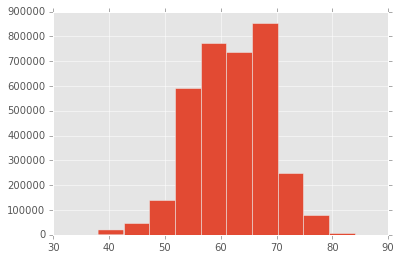

In [191]:
# map the relationship about trips and temperature
weather_join_trips['mean_temperature_f'].hist()

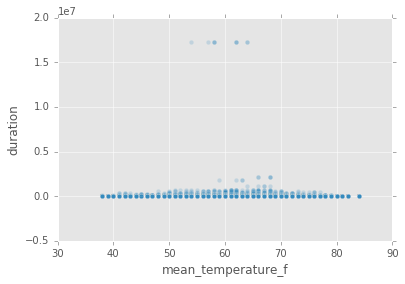

In [203]:
weather_join_trips.plot(kind='scatter', x='mean_temperature_f', y='duration', alpha=0.2)

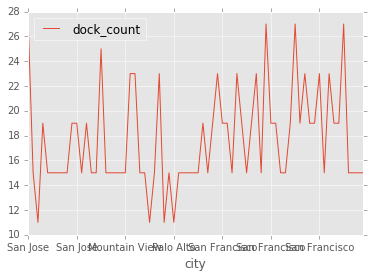

In [233]:
stations.plot(kind='line', x='city', y='dock_count')

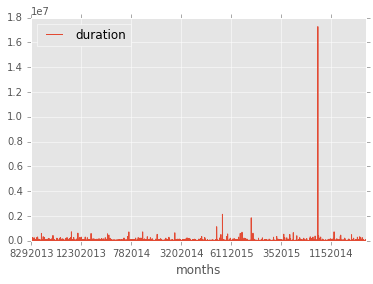

In [235]:
trips1.plot(kind='line', x='months', y='duration')